In [ ]:
import pandas as pd
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, plot_confusion_matrix
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from matplotlib import cm as cm

In [ ]:
def computeAccuracy(features_file, n_components):
  df = pickle.load(open(features_file, 'rb'))
  # split dataframe into features and label
  X = list(df.Features.to_numpy())
  y = df.Images.to_numpy()
  # Split dataset into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=7, stratify=y)
  # feature scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # PCA
  pca = PCA(n_components=n_components)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  # LDA
  lda = LDA(n_components=1)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  # 1-NN
  nn_classifier = KNeighborsClassifier(n_neighbors=30)
  nn_classifier.fit(X_train, y_train)
  y_pred = nn_classifier.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  return accuracy, X_test

def plot_affinity(X_test, affinity_title='Affinity Matrix', affinity_style='Greens'):
  # plotting affinity
  affinity = cdist(X_test[:100], X_test[:100])
  fig, ax = plt.subplots(figsize=(15,15))
  cax = ax.matshow(affinity, interpolation='nearest', cmap=cm.get_cmap(affinity_style))
  ax.grid(True)
  plt.title(affinity_title)
  fig.colorbar(cax)
  plt.show()

0.2671428571428571


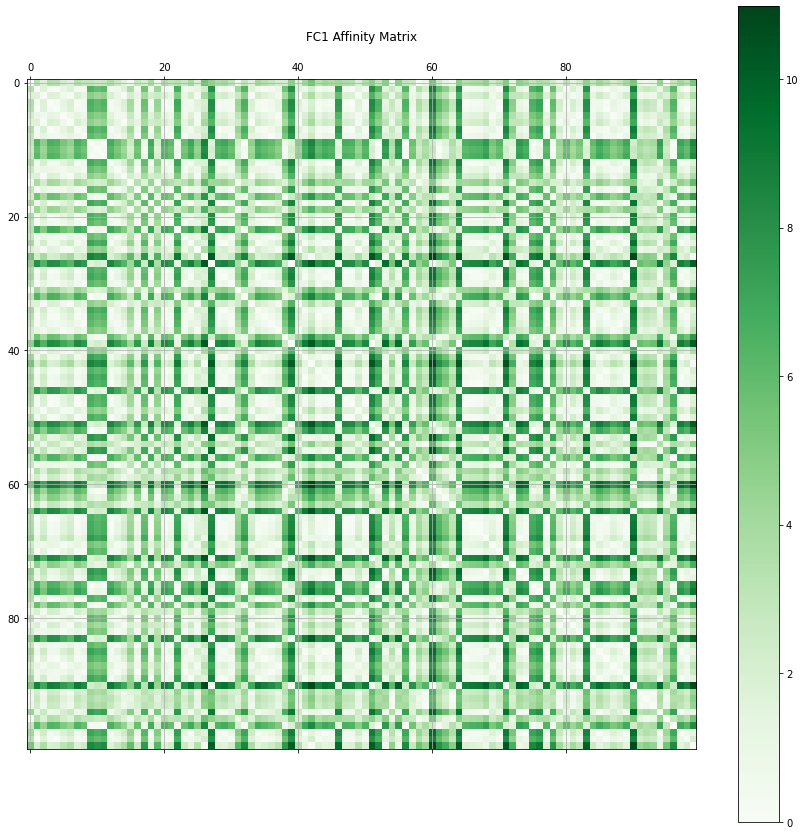

In [ ]:
FC1_accuracy, FC1_test = computeAccuracy('/content/drive/MyDrive/ComputerVision/Q1Features/FC1_features.pkl', 0.50)
print(FC1_accuracy)
plot_affinity(FC1_test, 'FC1 Affinity Matrix', 'Greens')

0.23714285714285716


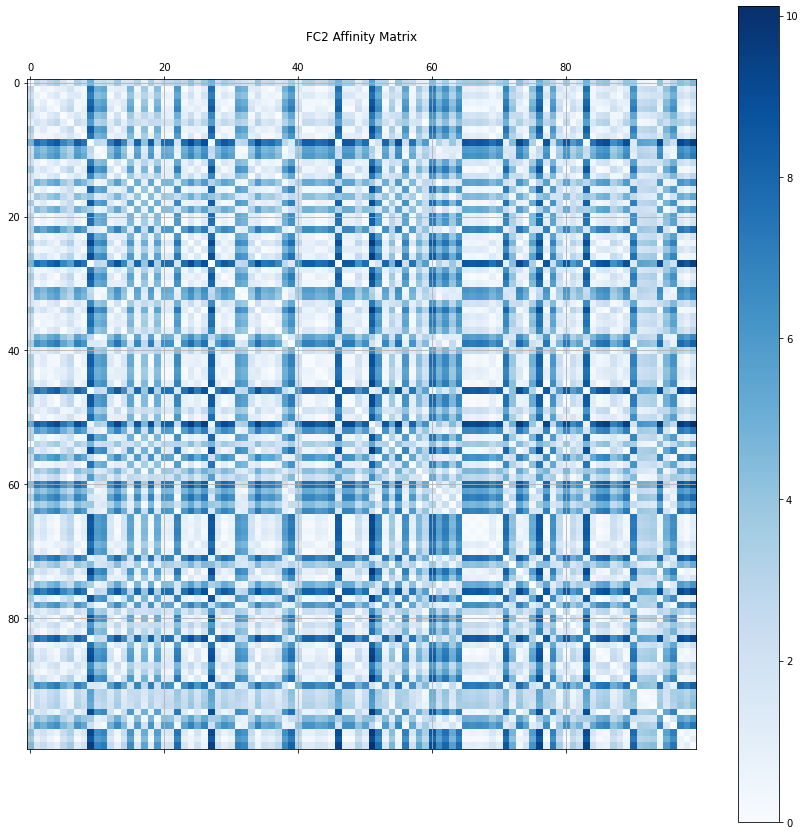

In [ ]:
FC2_accuracy, FC2_test = computeAccuracy('/content/drive/MyDrive/ComputerVision/Q1Features/FC2_features.pkl', 0.50)
print(FC2_accuracy)
plot_affinity(FC2_test, 'FC2 Affinity Matrix', 'Blues')

0.20809523809523808


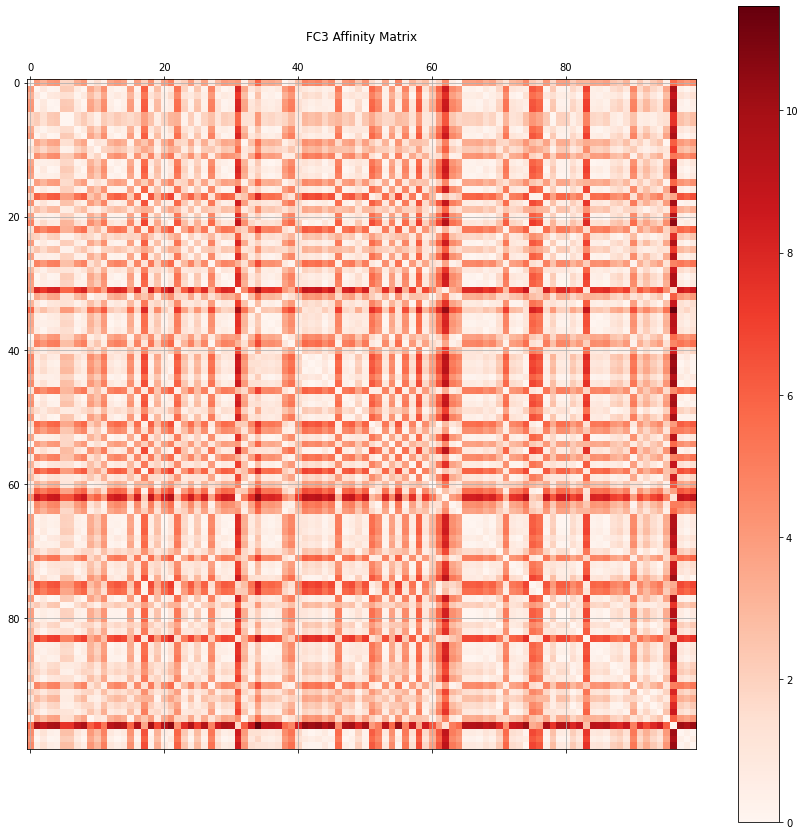

In [ ]:
FC3_accuracy, FC3_test = computeAccuracy('/content/drive/MyDrive/ComputerVision/Q1Features/FC3_features.pkl', 0.50)
print(FC3_accuracy)
plot_affinity(FC3_test, 'FC3 Affinity Matrix', 'Reds')